In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [29]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    #return np.linalg.lstsq(np.transpose(tx).dot(tx), np.transpose(tx).dot(y),rcond=None)[0]
    return np.linalg.solve(np.transpose(tx).dot(tx), np.transpose(tx).dot(y))
 

    

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    return least_squares(y,tx)

Test it here

In [43]:
test_your_least_squares()

array([73.293922  , 13.47971243])

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [26]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly=np.array([])
    poly.shape=(len(x), 0)
    for deg in range(0, degree+1):
        poly = np.c_[poly, np.power(x,deg)]
    return poly

In [25]:
build_poly(x,5)

array([[1.00000000e+00, 3.52374910e-01, 1.24168077e-01, 4.37537150e-02,
        1.54177114e-02, 5.43281467e-03],
       [1.00000000e+00, 4.89512330e+00, 2.39622321e+01, 1.17298081e+02,
        5.74188568e+02, 2.81072384e+03],
       [1.00000000e+00, 1.86662437e+00, 3.48428655e+00, 6.50385420e+00,
        1.21402528e+01, 2.26612917e+01],
       [1.00000000e+00, 3.50706129e+00, 1.22994789e+01, 4.31350264e+01,
        1.51277181e+02, 5.30538347e+02],
       [1.00000000e+00, 3.38087384e+00, 1.14303079e+01, 3.86444289e+01,
        1.30651939e+02, 4.41717721e+02],
       [1.00000000e+00, 7.30937276e-01, 5.34269301e-01, 3.90517348e-01,
        2.85443686e-01, 2.08641431e-01],
       [1.00000000e+00, 3.88562366e+00, 1.50980712e+01, 5.86654226e+01,
        2.27951754e+02, 8.85734728e+02],
       [1.00000000e+00, 5.65224803e+00, 3.19479078e+01, 1.80577499e+02,
        1.02066881e+03, 5.76907329e+03],
       [1.00000000e+00, 6.28318531e+00, 3.94784176e+01, 2.48050213e+02,
        1.55854546e+03, 

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [30]:
from plots import *
from costs import compute_mse

def polynomial_regression(x,y):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    
    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx=build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        weights=least_squares(y,tx)
        rmse=np.sqrt(2*compute_mse(y-tx.dot(weights)))
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

TypeError: compute_mse() missing 2 required positional arguments: 'tx' and 'w'

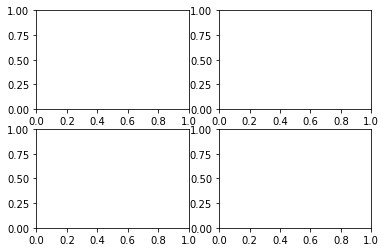

In [31]:
polynomial_regression(x,y)

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [359]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    n=x.shape[0]
    indices = np.random.permutation(n)
    training_idx, test_idx = indices[:int(n*ratio)], indices[int(n*ratio):]
    x_training, x_test = x[training_idx], x[test_idx]
    y_training, y_test = y[training_idx], y[test_idx]
    
    return x_training, x_test, y_training, y_test
    """
    # set seed
    np.random.seed(seed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te


Then, test your `split_data` function below.

In [363]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    xtr,xte,ytr,yte = split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phitr=build_poly(xtr,degree)
    phite=build_poly(xte,degree)
    
    print(xtr)

    weights=least_squares(ytr,phitr)

   
    rmse_tr=np.sqrt(2*compute_mse(ytr,phitr,weights))
    rmse_te=np.sqrt(2*compute_mse(yte,phite,weights))
    
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [364]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

[5.77843549 3.00231147 2.6237491  5.02131076 1.86662437 3.50706129
 2.74993656 1.2356871  5.90462294 1.99281183 1.48806201 5.52606058
 0.98331219 0.22618746 2.87612401 3.12849893 5.14749821 4.01181111
 1.10949964 2.49756165 4.76893584 6.0308104  3.25468638 2.11899928
 0.1        3.38087384 4.64274839 1.61424946 2.24518674 0.60474982
 4.26418602 3.7594362  4.39037348 0.47856237 4.51656093 1.36187455
 3.88562366 5.65224803 4.13799857 4.8951233  6.15699785 0.35237491
 5.39987312 0.73093728 3.63324875]
proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
[5.77843549 3.00231147 2.6237491  5.02131076 1.86662437 3.50706129
 2.74993656 1.2356871  5.90462294 1.99281183 1.48806201 5.52606058
 0.98331219 0.22618746 2.87612401 3.12849893 5.14749821 4.01181111
 1.10949964 2.49756165 4.76893584 6.0308104  3.25468638 2.11899928
 0.1        3.38087384 4.64274839 1.61424946 2.24518674 0.60474982
 4.26418602 3.7594362  4.39037348 0.47856237 4.51656093 1.36187455
 3.88562366 5.65224803 4.137

# 3 Ridge Regression
Please fill in the function below.

In [330]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    #return np.linalg.lstsq(np.transpose(tx).dot(tx)+lambda_*np.eye(tx.shape[1]), np.transpose(tx).dot(y),rcond=None)[0]
    # -*- coding: utf-8 -*-

    
    """implement ridge regression."""
    aI = lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

In [324]:
ridge_regression(y,tx,1)

NameError: name 'tx' is not defined

In [333]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    return ridge_regression(y,tx,0)

test_your_least_squares()

array([73.293922  , 13.47971243])

In [338]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    xtr,xte,ytr,yte = split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phitr=build_poly(xtr,degree)
    phite=build_poly(xte,degree)
        
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        weights=ridge_regression(ytr,phitr,lambda_)
        
        rmse_tr.append(np.sqrt(2*compute_mse(ytr,phitr,weights)))
        rmse_te.append(np.sqrt(2*compute_mse(yte,phite,weights)))
        
        
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.218, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.218, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.219, Testing RMSE=0.331
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.219, Testing RMSE=0.328
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.219, Testing RMSE=0.322
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.221, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.223, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.225, Testing RMSE=0.323
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.226, Testing RMSE=0.326
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.227, Testing RMSE=0.328
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.228, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.228, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.193, 

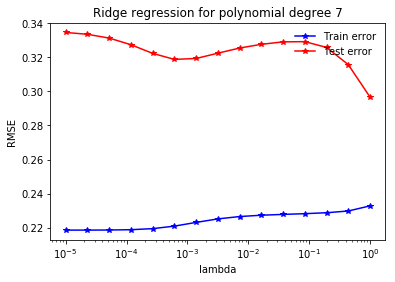

In [339]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)